# Hypothesis Testing with Health Insurance Data

- Kevin Barnett
- 05/12/23

## Tasks

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

> alpha = 0.05

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load data
df = pd.read_csv('/Users/kevinbarnett/Documents/GitHub/Hypothesis-Testing-with-Health-Insurance-Data-Core-Assignment/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Question 1: Do smokers have higher insurance charges than non-smokers?

> Null Hypothesis: There is no difference in insurance charges between smokers and non-smokers

> Alternative Hypothesis: There is a difference in insurance charges between smokers and non-smokers

In [3]:
# Determine how many people are in each group
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
# Split into two groups
smokers_df = df.loc[df['smoker'] == 'yes'].copy()
non_smokers_df = df.loc[df['smoker'] == 'no'].copy()
print(smokers_df.head())
non_smokers_df.head()

    age     sex    bmi  children smoker     region     charges
0    19  female  27.90         0    yes  southwest  16884.9240
11   62  female  26.29         0    yes  southeast  27808.7251
14   27    male  42.13         0    yes  southeast  39611.7577
19   30    male  35.30         0    yes  southwest  36837.4670
23   34  female  31.92         1    yes  northeast  37701.8768


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [26]:
# Define feature of interest
smoker_charges = smokers_df['charges']
non_smoker_charges = non_smokers_df['charges']

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [6]:
# Find mean for each group
smoker_charges_mean = smoker_charges.mean()
print(f'Avg charge for smokers: {smoker_charges_mean}')
non_smoker_charges_mean = non_smoker_charges.mean()
print(f'Avg charge for non smokers: {non_smoker_charges_mean}')

Avg charge for smokers: 32050.23183153284
Avg charge for non smokers: 8434.268297856204


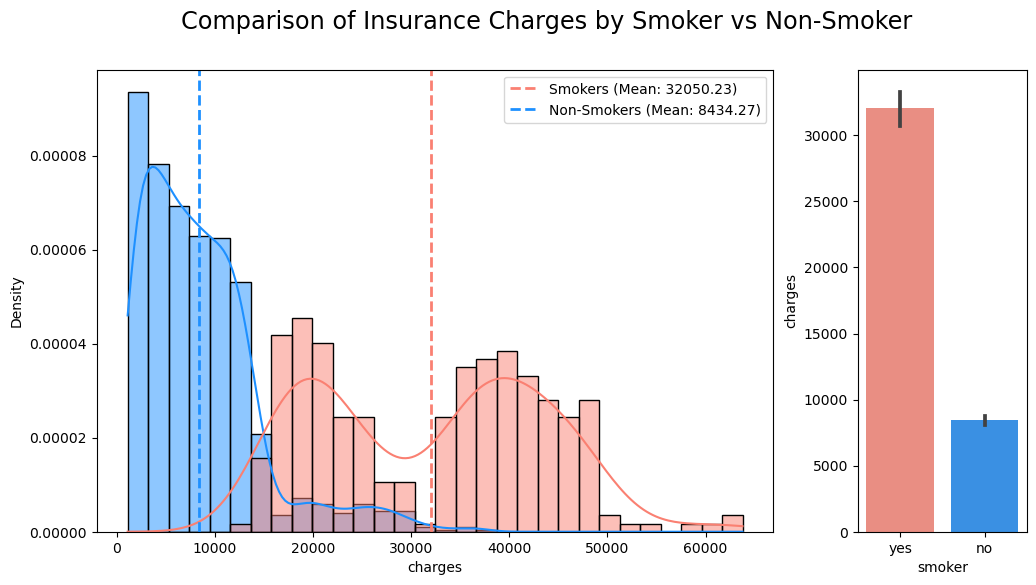

In [7]:
# Visualize distribution of each group
smoker_palette = {'no':'dodgerblue','yes':'salmon'}
fig, (ax,ax_bar) = plt.subplots(figsize=(12,6), ncols=2, 
                                gridspec_kw={'width_ratios':[0.8,0.2]})

# Histogram of distributions
sns.histplot(df, x='charges', hue='smoker', stat='density', kde=True, 
             common_norm=False, ax=ax, palette=smoker_palette)
ax.ticklabel_format(style='plain', axis='y')
ax.axvline(smoker_charges_mean, c=smoker_palette['yes'], ls='--', lw=2,
          label=f'Smokers (Mean: {smoker_charges_mean:.2f})')
ax.axvline(non_smoker_charges_mean, c=smoker_palette['no'], ls='--', lw=2,
          label=f'Non-Smokers (Mean: {non_smoker_charges_mean:.2f})')
ax.legend();

# Barplot
sns.barplot(data=df, x='smoker', y='charges', ax=ax_bar, palette=smoker_palette)
fig.suptitle('Comparison of Insurance Charges by Smoker vs Non-Smoker',
            fontsize='xx-large');

In [8]:
# Test for significant outliers
smoker_zscores = stats.zscore(smoker_charges)
smoker_outliers = abs(smoker_zscores)>3
non_smoker_zscores = stats.zscore(non_smoker_charges)
non_smoker_outliers = abs(non_smoker_zscores)>3

print(f'Num sig outliers for smokers: {np.sum(smoker_outliers)}')
print(f'Num sig outliers for non-smokers: {np.sum(non_smoker_outliers)}')

Num sig outliers for smokers: 0
Num sig outliers for non-smokers: 24


In [9]:
# Remove outliers in the non-smoker group
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges))<3)] 
non_smoker_zscores = stats.zscore(non_smoker_charges)
non_smoker_outliers = abs(non_smoker_zscores)>3

print(f'Num sig outliers for non-smokers: {np.sum(non_smoker_outliers)}')

Num sig outliers for non-smokers: 19


In [10]:
# Test for normality
result_smoker = stats.normaltest(smoker_charges)
result_non_smoker = stats.normaltest(non_smoker_charges)

print(f'Smokers: {result_smoker}')
print(f'Non-Smokers: {result_non_smoker}')

Smokers: NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
Non-Smokers: NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


> Both groups are not normally distributed. We can continue since each group has a sample of more than 15

In [11]:
# Test for equal variance
var_result = stats.levene(smoker_charges, non_smoker_charges)
var_result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

> There is not equal variance between each group

In [12]:
# Independent t-test
ttest_result = stats.ttest_ind(non_smoker_charges, smoker_charges, 
                              equal_var=False)
ttest_result

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)

> The pvalue is < 0.05 so we can reject the null hypothesis and accept that smokers have higher insurance charges than non-smokers

## Question 2: Are men more likely to smoke than women?

> Null Hypothesis: Men are not more likely to smoke than women

> Alternative Hypothesis: Men are more likely to smoke than women

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# Contingency table
table = pd.crosstab(index=df['sex'], columns=df['smoker'])

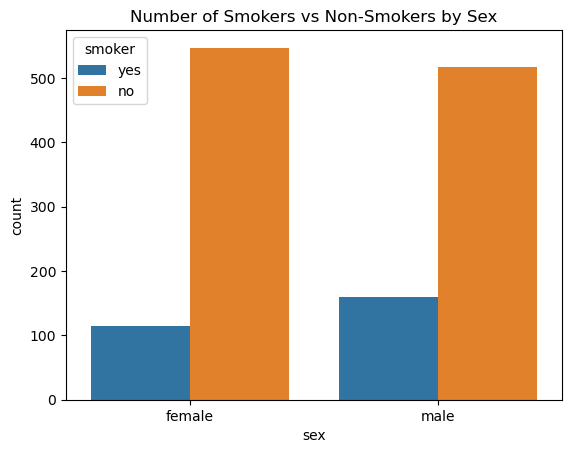

In [15]:
# Visualize smoker vs non-smoker by sex
ax = sns.countplot(data=df, x='sex', hue='smoker');
ax.set_title('Number of Smokers vs Non-Smokers by Sex');

In [16]:
# Chi-squared test
chi_result = stats.chi2_contingency(table)

# Label results
chi2, p, deg_free, expected_vals = chi_result
print(p)
p<0.05

0.006548143503580696


True

> The pvalue is < 0.05 so we can reject the null and conclude that men are more likely to smoke than women

## Question 3: Do different regions have different charges, on average?

> Null Hypothesis: Different regions have the same charges on average

> Alternate Hypothesis: Different regions have a significant difference in charges on average

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

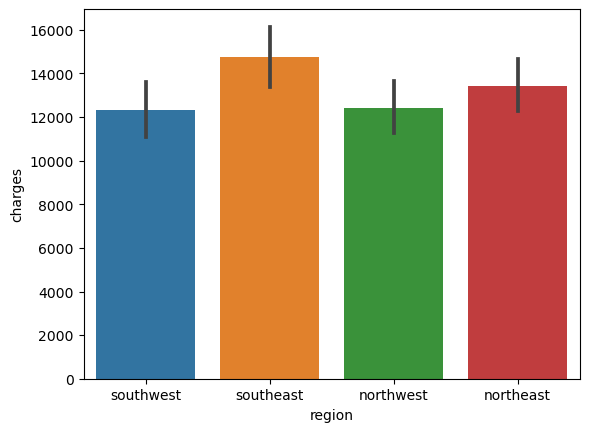

In [19]:
sns.barplot(data=df, x='region', y='charges');

In [20]:
# Create groups dictionary
# Empty dictionary
groups = {}

# For loop to iterate through dataframe to assign regions to keys and 
# charges to values
for i in df['region'].unique():
    
    # Get series for group and rename
    data = df.loc[df['region'] == i, 'charges'].copy()
    
    # Save into dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [21]:
# Test normality
# Run normal test on each group
norm_results = {}

for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p': p, 'test stat': stat}

# Convert to dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [22]:
norm_results_df['sig'] = norm_results_df['p'] < 0.05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [23]:
# Testing for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [24]:
# One way ANOVA test
result = stats.f_oneway()

TypeError: at least two inputs are required; got 0.